Understanding Logisitic Regression
=================


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

## Understanding probability, odds and logodds

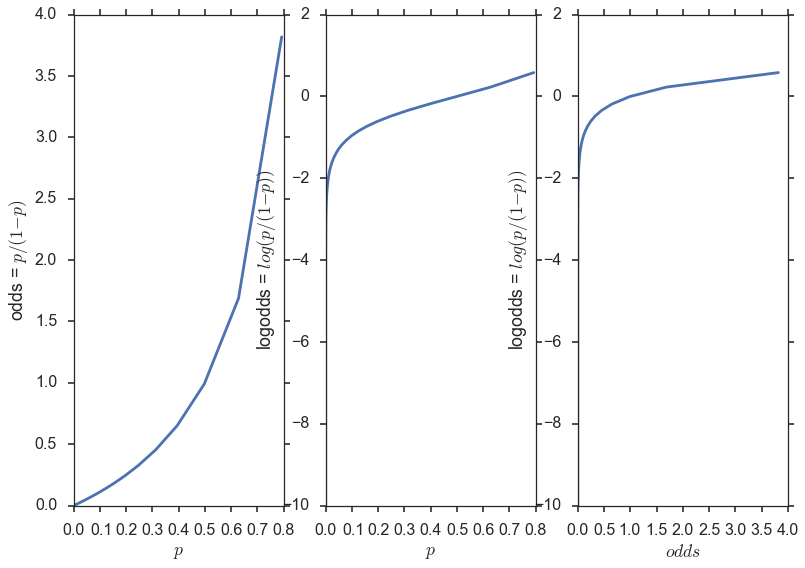

In [12]:
p = np.logspace(-10,0,100)
odds = p/(1.0-p)
logodds = np.log10(odds)
fig, ax = plt.subplots(1,3)

ax[0].plot(p, odds)
ax[0].set_xlabel("$p$")
ax[0].set_ylabel("odds = $p/(1-p)$")

ax[1].plot(p, logodds)
ax[1].set_xlabel("$p$")
ax[1].set_ylabel("logodds = $log(p/(1-p))$")


ax[2].plot(odds, logodds)
ax[2].set_xlabel("$odds$")
ax[2].set_ylabel("logodds = $log(p/(1-p))$")


In [21]:
from sklearn import linear_model, datasets, cross_validation

In [16]:
diabetes = datasets.load_diabetes()

In [39]:
X = diabetes.data[:]
y = np.vectorize(lambda x: 0 if x< 100 else 1)(diabetes.target)
logit = linear_model.LogisticRegression()
acc = cross_validation.cross_val_score(logit, X, y, n_jobs=1)
print acc

[ 0.70945946  0.65986395  0.66666667]


In [40]:
logit.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [42]:
logit.coef_

array([[ 0.66834777, -0.09381201,  2.55282766,  2.0349491 ,  0.73192008,
         0.63515804, -2.13431027,  1.83403445,  2.80990382,  1.46343646]])

In [31]:
X.shape

(442L, 10L)

In [38]:
np.vectorize(lambda x: 0 if x< 100 else 1)(y)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1,

In [34]:
np.unique(y)

array([  25.,   31.,   37.,   39.,   40.,   42.,   43.,   44.,   45.,
         47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,   55.,
         57.,   58.,   59.,   60.,   61.,   63.,   64.,   65.,   66.,
         67.,   68.,   69.,   70.,   71.,   72.,   73.,   74.,   75.,
         77.,   78.,   79.,   80.,   81.,   83.,   84.,   85.,   86.,
         87.,   88.,   89.,   90.,   91.,   92.,   93.,   94.,   95.,
         96.,   97.,   98.,   99.,  100.,  101.,  102.,  103.,  104.,
        107.,  108.,  109.,  110.,  111.,  113.,  114.,  115.,  116.,
        118.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,  127.,
        128.,  129.,  131.,  132.,  134.,  135.,  136.,  137.,  138.,
        139.,  140.,  141.,  142.,  143.,  144.,  145.,  146.,  147.,
        148.,  150.,  151.,  152.,  153.,  154.,  155.,  156.,  158.,
        160.,  161.,  162.,  163.,  164.,  166.,  167.,  168.,  170.,
        171.,  172.,  173.,  174.,  175.,  177.,  178.,  179.,  180.,
        181.,  182.,

In [46]:
df = pd.DataFrame(X, columns=["x%s" %k for k in range(X.shape[1])])
df["y_lbl"] = y

In [47]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y_lbl
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1


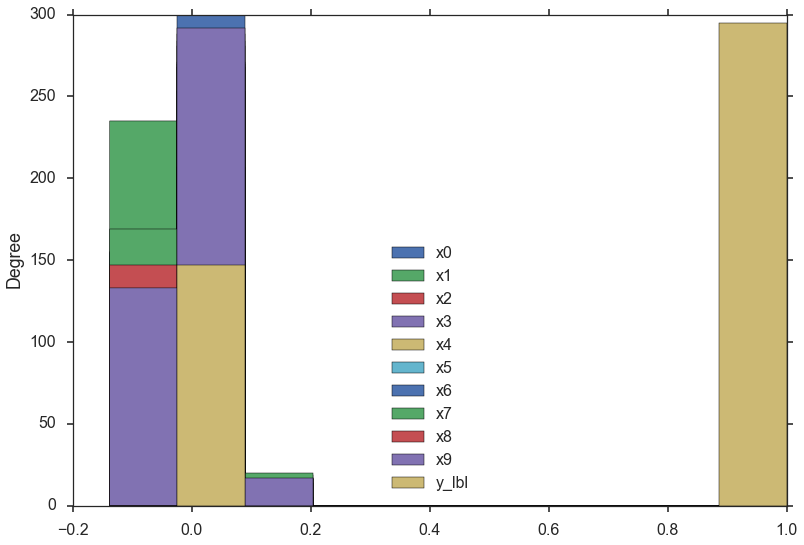

In [50]:
df.plot(kind="hist")